True

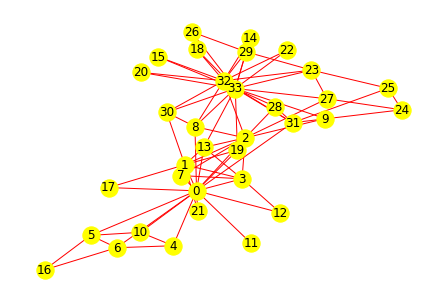

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline
G = nx.karate_club_graph()
nx.draw(G, with_labels = True, node_color = "yellow", edge_color = "red")
plt.savefig("karate_graph.pdf")
G.degree(0) is G.degree()[0]

In [9]:
nx.erdos_renyi_graph(10,1)

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

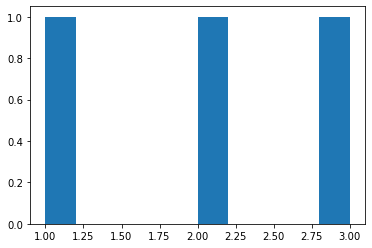

In [7]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

In [8]:
nx.erdos_renyi_graph(100, 0.03)


In [9]:
nx.erdos_renyi_graph(100, 0.30)


In [15]:
'''
    HOMEWORK
'''
# Ex.1
from collections import Counter
import numpy as np

def marginal_prob(chars):
    frequencies = dict(Counter(chars.values()))
    sum_frequencies = sum(frequencies.values())
    return {char: freq / sum_frequencies for char, freq in frequencies.items()}
                
def chance_homophily(chars):
    marginal_probs = marginal_prob(chars)
    return np.sum(np.square(list(marginal_probs.values())))

favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.5555555555555556


In [17]:
# Ex.2
import pandas as pd

df  = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@individual_characteristics.csv", low_memory=False, index_col=0)
df1 = df[df["village"]==1]
df2 = df[df["village"]==2]

df1.head(10)

,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
0,1,5,100201,1002,1,1,Head of Household,38,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0.0,No,NaN,No,NaN,Yes,Yes,GREEN
1,1,6,100202,1002,2,2,Spouse of Head of Household,27,HINDUISM,OBC,...,NaN,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
2,1,23,100601,1006,1,1,Head of Household,29,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
3,1,24,100602,1006,2,2,Spouse of Head of Household,24,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1.0,Yes,1.0,Yes,No,NaN
4,1,27,100701,1007,1,1,Head of Household,58,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
5,1,28,100702,1007,2,2,Spouse of Head of Household,40,HINDUISM,OBC,...,OWN LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
6,1,33,100801,1008,1,1,Head of Household,54,HINDUISM,OBC,...,OWN,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
7,1,34,100802,1008,2,2,Spouse of Head of Household,45,HINDUISM,OBC,...,LAND LORD,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
8,1,37,100805,1008,5,2,Other,45,HINDUISM,OBC,...,NaN,NaN,NaN,No,NaN,No,NaN,Yes,Yes,RED
9,1,38,100806,1008,6,1,Other,40,HINDUISM,OBC,...,GOVERNMENT,No,NaN,No,NaN,No,NaN,Yes,Yes,RED


In [18]:
sex1 = df1.set_index("pid")["resp_gend"].to_dict()
caste1 = df1.set_index("pid")["caste"].to_dict()
religion1 = df1.set_index("pid")["religion"].to_dict()

sex2 = df2.set_index("pid")["resp_gend"].to_dict()
caste2 = df2.set_index("pid")["caste"].to_dict()
religion2 = df2.set_index("pid")["religion"].to_dict()

caste2[202802]

'OBC'

In [19]:
print("Village 1 chance of same sex:", chance_homophily(sex1))
print("Village 1 chance of same caste:", chance_homophily(caste1))
print("Village 1 chance of same religion:", chance_homophily(religion1))

print("Village 2 chance of same sex:", chance_homophily(sex2))
print("Village 2 chance of same caste:", chance_homophily(caste2))
print("Village 2 chance of same religion:", chance_homophily(religion2))

Village 1 chance of same sex: 0.5027299861680701
Village 1 chance of same caste: 0.6741488509791551
Village 1 chance of same religion: 0.9804896988521925
Village 2 chance of same sex: 0.5005945303210464
Village 2 chance of same caste: 0.425368244800893
Village 2 chance of same religion: 1.0


In [20]:
def homophily(G, chars, IDs):
    """
    Given a network G, a dict of characteristics chars for node IDs,
    and dict of node IDs for each node in the network,
    find the homophily of the network.
    """
    num_same_ties = 0
    num_ties = 0
    for n1, n2 in G.edges():
        if IDs[n1] in chars and IDs[n2] in chars:
            if G.has_edge(n1, n2):
                num_ties += 1
                if chars[IDs[n1]] == chars[IDs[n2]]:
                    num_same_ties += 1
    return (num_same_ties / num_ties)

In [21]:
data_filepath1 = "https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@key_vilno_1.csv"
data_filepath2 = "https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@key_vilno_2.csv"

pid1 = pd.read_csv(data_filepath1, index_col=0)
pid2 = pd.read_csv(data_filepath2, index_col=0)

pid1.iloc[100]

0    102205
Name: 100, dtype: int64

In [23]:
import networkx as nx
A1 = np.array(pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@adj_allVillageRelationships_vilno1.csv", index_col=0))
A2 = np.array(pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@adj_allVillageRelationships_vilno2.csv", index_col=0))
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

pid1 = pd.read_csv(data_filepath1, dtype=int)['0'].to_dict()
pid2 = pd.read_csv(data_filepath2, dtype=int)['0'].to_dict()

print("Village 1 observed proportion of same sex:", homophily(G1, sex1, pid1))
print("Village 1 observed proportion of same caste:", homophily(G1, caste1, pid1))
print("Village 1 observed proportion of same religion:", homophily(G1, religion1, pid1))

print("Village 2 observed proportion of same sex:", homophily(G2, sex2, pid2))
print("Village 2 observed proportion of same caste:", homophily(G2, caste2, pid2))
print("Village 2 observed proportion of same religion:", homophily(G2, religion2, pid2))

print("Village 1 chance of same sex:", chance_homophily(sex1))
print("Village 1 chance of same caste:", chance_homophily(caste1))
print("Village 1 chance of same religion:", chance_homophily(religion1))

print("Village 2 chance of same sex:", chance_homophily(sex2))
print("Village 2 chance of same caste:", chance_homophily(caste2))
print("Village 2 chance of same religion:", chance_homophily(religion2))

Village 1 observed proportion of same sex: 0.5908629441624366
Village 1 observed proportion of same caste: 0.7959390862944162
Village 1 observed proportion of same religion: 0.9908629441624366
Village 2 observed proportion of same sex: 0.5658073270013568
Village 2 observed proportion of same caste: 0.8276797829036635
Village 2 observed proportion of same religion: 1.0
Village 1 chance of same sex: 0.5027299861680701
Village 1 chance of same caste: 0.6741488509791551
Village 1 chance of same religion: 0.9804896988521925
Village 2 chance of same sex: 0.5005945303210464
Village 2 chance of same caste: 0.425368244800893
Village 2 chance of same religion: 1.0
